In [2]:
from warnings import warn
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')         # to fliter warning in notebook

In [14]:
dmd_df = pd.read_csv('D:/Military/Crawl/dmd_df_.csv')
prd_df = pd.read_csv('D:/Military/Crawl/prd_df_.csv')

## Data Prepration 

In [4]:
import nltk
from nltk.corpus import stopwords
import re
import codecs
from hazm import *
from collections import Counter

In [73]:
nmz = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()
tagger = POSTagger(model='pos_tagger.model')  # Adjust the model path if necessary

nltk.download("punkt_tab")

en_stops = set(stopwords.words("english")) 
fa_stops = sorted(list(set([nmz.normalize(w) for w in codecs.open(
    'persian.txt', encoding='utf-8').read().split('\n') if w])))
tech_stops = sorted(list(set([nmz.normalize(w) for w in codecs.open(
    'technical_stop.txt', encoding='utf-8').read().split('\n') if w])))

def tokenize(df, columns):
    for c in columns:
        df = df.drop('tokenized_' + str(c), axis=1, errors='ignore')        
        df.insert(loc=df.shape[1], column='tokenized_' + str(c), value=None)
        # Process each row in the specified column
        for i in range(df.shape[0]):
            tokenized_dataset = []
            # Replace punctuation with space
            text = re.sub(r'[^\w\s]', ' ', str(df[c][i]))
            # Step 1: Normalize the text
            normalized_text = nmz.normalize(text)
            # Step 2: Tokenize the normalized text
            tokens = nltk.word_tokenize(normalized_text)
            # Step 3: POS tagging
            tagged_tokens = tagger.tag(tokens)
            # Step 4: Stem, lemmatize, and keep only nouns (tagged as 'NOUN','NOUN,EZ')
            filtered_words = [
                lemmatizer.lemmatize(stemmer.stem(word)) 
                for word, pos in tagged_tokens 
                if pos in (['NOUN','NOUN,EZ']) 
                and word not in fa_stops 
                and word.lower() not in en_stops 
                and word not in tech_stops 
                and not word.isdigit()
            ]            
            # Append the filtered words to the tokenized dataset
            tokenized_dataset.append(filtered_words)
            # Save the tokenized dataset to the new column
            df.at[i, 'tokenized_' + str(c)] = tokenized_dataset[0]
    return df

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WALLEX\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
tokenized_dmd_df = tokenize(dmd_df,['dmd_title','dmd_description','dmd_key_words'])
tokenized_dmd_df.to_csv('tokenized_dmd_df_.csv', encoding='utf-8', index=False)
tokenized_dmd_df.head(3)

,Unnamed: 0,dmd_id,dmd_title,dmd_urlIdentifier,dmd_description,dmd_key_words,dmd_expiration_date,tokenized_dmd_title,tokenized_dmd_description,tokenized_dmd_key_words
0,0,19a64f7d-731a-421b-9562-231ef4d60b9e,فناوري توليد پودر قارچ,DMD-1,فناوري توليد پودر قارچ,['پودر-قارچ'],3/20/2016 0:00,"['پودر', 'قارچ']","['پودر', 'قارچ']","['پودر', 'قارچ']"
1,1,bc708481-3adc-4e9c-87b7-47ab1fed058f,بافرهاي شيميائي مخصوص براي تجهيزات آزمايشگاهي,DMD-2,گاهی لازم است محلولی را که دارای PH معین است،...,['بافرهاي-شيميائي-مخصوص-براي-تجهيزات-آزمايشگاهي'],3/20/2018 23:00,['بافر'],"['محلول', 'PH', 'ذخیره', 'نگهدار', 'محلول', 'م...",['بافر']
2,2,86689458-6cda-4000-800f-33c5ae5c8732,آنتي باديهاي مونوكلونال,DMD-3,موادي هستند كه بر روي كيتهاي تشخيص طبي پوشش دا...,['آنتي-باديهاي-مونوكلونال'],3/20/2018 23:00,"['آنت', 'بادی', 'مونوکلونال']","['مواد', 'کیت', 'پوش', 'واکن', 'نمونه', 'خون',...","['آنت', 'بادی', 'مونوکلونال']"


In [6]:
tokenized_prd_df = tokenize(prd_df,['prd_title','prd_description','prd_key_words'])
tokenized_prd_df.to_csv('tokenized_prd_df_.csv', encoding='utf-8', index=False)
tokenized_prd_df.head(3)

,Unnamed: 0,prd_id,prd_title,prd_urlIdentifier,prd_description,prd_key_words,prd_owner_id,prd_owner_type,prd_owner_name,tokenized_prd_title,tokenized_prd_description,tokenized_prd_key_words
0,0,f56abd31-3372-405b-8499-efa2ffbea04c,ره نگر - سامانه مدیریت هوشمند ناوگان,PRD-1,با ره‌نگر مکان ناوگان و پرسنل خود را هر لحظه ب...,"['مدیریت-ناوگان', 'AVL', 'حمل-و-نقل-هوشمند', '...",96e96d0c-39cd-463b-80d0-55235e58c724,COMPANY,ویرا تک شریف,"['ره', 'مدیر', 'ناوگ']","['ره', 'مک', 'ناوگ', 'پرسنل', 'وضع', 'عملکرد',...","['مدیر', 'ناوگ', 'AVL', 'حمل', 'نقل', 'مکان\u2..."
1,1,e812c593-0b7d-4a4a-bc2e-96be9b3b3b9d,پنجره - درگاه پیامک سازمانی,PRD-2,پنجره درگاه تجمیع خدمات سازمان در قالب تلفن هم...,['پیامک'],96e96d0c-39cd-463b-80d0-55235e58c724,COMPANY,ویرا تک شریف,"['پنجره', 'درگاه', 'پیامک']","['پنجره', 'درگاه', 'ساز', 'قالب', 'تلفن', 'قال...",['پیامک']
2,2,06f9cc76-a8bf-41a8-affa-c0cb34835a7a,کاتب - سامانه دبیرخانه و مکاتبات اداری,PRD-3,کاتب، مدیریت مکاتبات سازمانی شما را به سادگی و...,"['سازمان', 'اتوماسیون', 'مکاتبات', 'سامانه', '...",96e96d0c-39cd-463b-80d0-55235e58c724,COMPANY,ویرا تک شریف,"['کاتب', 'دبیرخانه', 'مکاتب']","['کاتب', 'مدیر', 'مکاتب', 'سادگ', 'بهینگ', 'مک...","['ساز', 'اتوماسیون', 'مکاتب', 'اتوماسیون', 'نا..."


In [100]:
my_list= tokenized_dmd_df['tokenized_dmd_description'].sum()
count_dict = Counter(my_list)
# Find the top most common values
top_common_values = count_dict.most_common(1000)
df_top_common_dmd = pd.DataFrame(top_common_values, columns=['Value', 'Count'])
df_top_common_dmd.to_csv('top_common_values_dmd.csv', index=False)

In [101]:
my_list= tokenized_prd_df['tokenized_prd_key_words'].sum()
count_dict = Counter(my_list)
# Find the top most common values
top_common_values = count_dict.most_common(1000)
df_top_common_prd = pd.DataFrame(top_common_values, columns=['Value', 'Count'])
df_top_common_prd.to_csv('top_common_values_prd.csv', index=False)

In [3]:
# tokenized_dmd_df = pd.read_csv('tokenized_dmd_df.csv')
# tokenized_prd_df = pd.read_csv('tokenized_prd_df.csv')

## Word Cloud

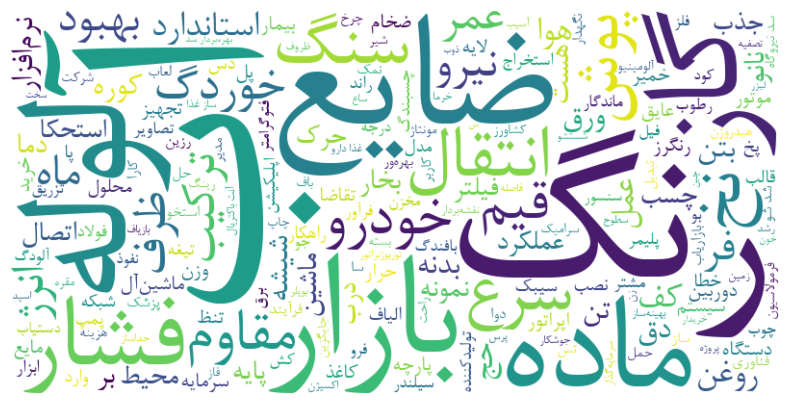

In [46]:
from wordcloud import WordCloud
import ast  # To convert strings to lists
import arabic_reshaper  # For reshaping Persian words
from bidi.algorithm import get_display  # For correct display of RTL text


# Convert the string representations of lists into actual lists
# tokenized_dmd_df['tokenized_dmd_description'] = tokenized_dmd_df['tokenized_dmd_description'].apply(ast.literal_eval)

# Flatten the lists into a single list
all_words = [word for sublist in tokenized_dmd_df['tokenized_dmd_description'] for word in sublist]

# Join the list of Persian words into a single string
text = " ".join(all_words)
# Reshape the text and reverse for proper display
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)

font_path = 'BNazanin.ttf' # Update this to your font location

# Create a WordCloud object with Persian support
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(bidi_text)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()


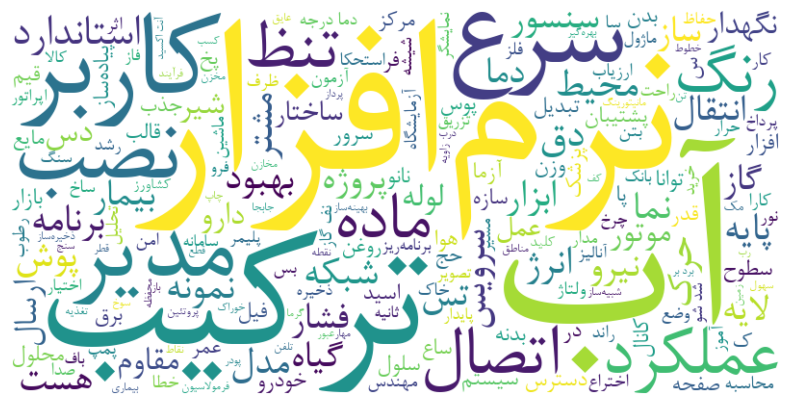

In [47]:
# Convert the string representations of lists into actual lists
tokenized_prd_df['tokenized_prd_description'] = tokenized_prd_df['tokenized_prd_description'].apply(ast.literal_eval)

# Flatten the lists into a single list
all_words = [word for sublist in tokenized_prd_df['tokenized_prd_description'] for word in sublist]

# Join the list of Persian words into a single string
text = " ".join(all_words)
# Reshape the text and reverse for proper display
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)

font_path = 'BNazanin.ttf' # Update this to your font location

# Create a WordCloud object with Persian support
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(bidi_text)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()
